In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

conexicon a base de datos

In [4]:
try:
    conn = psycopg2.connect(
        dbname="empresa_sales",
        user="postgres",
        password="Josepicalua123.",
        host="localhost",
        port="5432"
    )
    cursor = conn.cursor()
    print(f"✅ Conexión exitosa")
except Exception as e:
    print(f"❌ Error: {e}")

✅ Conexión exitosa


consulta de productos con mayores compras

In [11]:
def consultas_dataframe(consultas, conn):
    try:
        df = pd.read_sql_query(consultas, conn)
        return df
    except Exception as e:
        print(f"❌ Error: {e}")
        return None



In [14]:
consulta_compras_provedor = "SELECT id_provedor, id_producto, cantidad_compra, price_unitario, total_compra FROM compra GROUP BY id_provedor, id_producto, cantidad_compra, price_unitario, total_compra"
df_consulta_compras_provedor = query_to_dataframe(consulta_compras_provedor, conn)
df_consulta_compras_provedor

C:\Users\josep\AppData\Local\Temp\ipykernel_9824\1638375261.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,id_provedor,id_producto,cantidad_compra,price_unitario,total_compra
0,917161,5473,7,141.98,993.86
1,732498,6221,3,207.07,621.21
2,815394,1604,8,499.52,3996.16
3,920932,9254,10,343.88,3438.80
4,791789,3863,9,356.71,3210.39
...,...,...,...,...,...
155,648557,5639,7,94.73,663.11
156,920932,9254,1,44.09,44.09
157,603327,5762,9,48.94,440.46
158,915550,3484,3,13.91,41.73


In [ ]:
df_consulta_compras_provedor['id_producto'].unique()

array([5473, 6221, 1604, 9254, 3863, 3216, 6984, 8772, 2161, 2272, 5516,
       2580, 2041, 3555, 9840, 5726, 3484, 9927, 2514, 8700, 4935, 7739,
       9448, 3043, 6906, 6169, 7015, 5440, 6312, 8068, 3387, 1436, 1724,
       8880, 4084, 1761, 5762, 2633, 5226, 5639])

Encontrar un mismo producto, comprado por diferecntes provedores y sus precios

In [52]:
# Encontrar los productos que se repiten
productos_repetidos = df_consulta_compras_provedor[df_consulta_compras_provedor.duplicated(['id_producto'], keep=False)]

# Agrupar por id_producto y listar los id_provedor y price_unitario asociados
productos_agrupados = productos_repetidos.groupby('id_producto').agg({
    'id_provedor': list,
    'price_unitario': list,
    'cantidad_compra': list
}).reset_index()

# Mostrar las primeras 5 filas
mostrar_5 = productos_agrupados.head(5)

mostrar_5

,id_producto,id_provedor,price_unitario,cantidad_compra
0,1436,"[834287, 834287, 834287, 834287]","[10.5, 398.82, 258.23, 460.16]","[5, 4, 9, 6]"
1,1604,"[815394, 815394, 815394, 815394]","[499.52, 171.67, 256.38, 97.74]","[8, 6, 9, 4]"
2,1724,"[914258, 914258, 914258, 914258]","[134.43, 480.41, 262.86, 298.83]","[7, 5, 8, 3]"
3,1761,"[815394, 815394, 815394, 815394]","[225.77, 261.21, 391.14, 295.46]","[2, 9, 10, 7]"
4,2041,"[939952, 939952, 939952, 939952]","[337.69, 162.87, 471.41, 334.16]","[6, 7, 7, 1]"


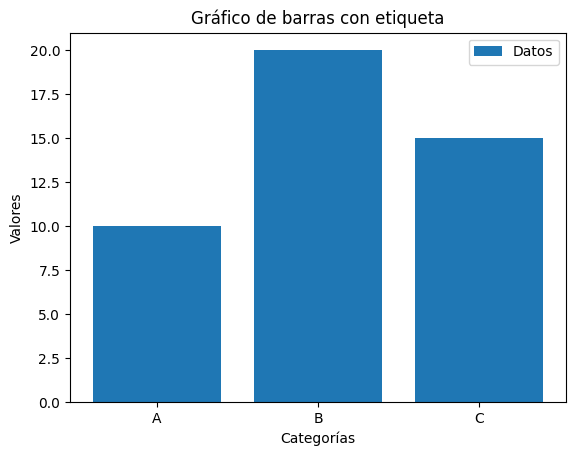

In [45]:

categorias = ['A', 'B', 'C']
valores = [10, 20, 15]

plt.bar(categorias, valores, label='Datos')
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Gráfico de barras con etiqueta')
plt.legend()
plt.show()